# training demo for sklearn models

In [1]:
import numpy as np
import pickle
import bz2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

In [2]:

Xtr_loadpath = 'Xtr.csv'
Xts_loadpath = 'Xts.csv'
ytr_loadpath = 'ytr.csv'

Xtr = np.loadtxt(Xtr_loadpath, delimiter=",")
Xts = np.loadtxt(Xts_loadpath, delimiter=",")
ytr = np.loadtxt(ytr_loadpath, delimiter=",")

In [3]:
scaler = preprocessing.StandardScaler().fit(Xtr)


Xtr_standardized = scaler.transform(Xtr) 
Xts_standardized = scaler.transform(Xts) 
ytr_standardized = ytr 

Xtr_savepath = 'Xtr_sklearn.csv'
Xts_savepath = 'Xts_sklearn.csv'
ytr_savepath = 'ytr_sklearn.csv'
yts_hat_savepath = 'yts_hat_sklearn.csv'

np.savetxt(Xtr_savepath, Xtr_standardized, delimiter=",")
np.savetxt(Xts_savepath, Xts_standardized, delimiter=",")
np.savetxt(ytr_savepath, ytr_standardized, delimiter=",")

In [4]:
scaler2 = preprocessing.MinMaxScaler().fit(Xtr)
Xtr_standardized2 = scaler2.transform(Xtr) 
Xts_standardized2 = scaler2.transform(Xts) 
ytr_standardized2 = ytr

Xtr_savepath2 = 'Xtr_sklearn_2.csv'
Xts_savepath2 = 'Xts_sklearn_2.csv'
ytr_savepath2 = 'ytr_sklearn_2.csv'

np.savetxt(Xtr_savepath2, Xtr_standardized2, delimiter=",")
np.savetxt(Xts_savepath2, Xts_standardized2, delimiter=",")
np.savetxt(ytr_savepath2, ytr_standardized2, delimiter=",")

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_val, y_train, y_val = train_test_split(Xtr_standardized, ytr_standardized, test_size=0.2, shuffle=True, random_state=42)
X_train2, X_val2, y_train2, y_val2 = train_test_split(Xtr_standardized2, ytr_standardized2, test_size=0.2, shuffle=True, random_state=42)

# Step1. Without feature selection, try the logistic regression method.

Try StandardScaler.

In [7]:
lr = LogisticRegression()
lr.fit(Xtr_standardized, ytr_standardized)

auc = roc_auc_score(ytr_standardized,lr.decision_function(Xtr_standardized))
print('training auc: ',auc)

training auc:  0.823108820797503


Try L1.

In [8]:
C_list = [1e-3, 0.01, 0.1, 1, 10, 100, 1000]

In [9]:
for C in C_list:
    lr = LogisticRegression(penalty='l1', C=C, solver='liblinear')
    lr.fit(X_train, y_train)

    auc = roc_auc_score(y_val,lr.decision_function(X_val))
    print('val auc: ',auc, C)

val auc:  0.8116068504249193 0.001
val auc:  0.8216092637603213 0.01
val auc:  0.8216954543103894 0.1
val auc:  0.821878609229284 1
val auc:  0.8218904604299184 10
val auc:  0.8218915378117942 100
val auc:  0.821893692575546 1000


Try L2.

In [10]:
for C in C_list:
    lr = LogisticRegression(penalty='l2', C=C)
    lr.fit(X_train, y_train)

    auc = roc_auc_score(y_val,lr.decision_function(X_val))
    print('val auc: ',auc, C)

val auc:  0.820800149971557 0.001
val auc:  0.8227846873868749 0.01
val auc:  0.8220865439313233 0.1
val auc:  0.8219217045043181 1
val auc:  0.8218872282842911 10
val auc:  0.8218872282842908 100
val auc:  0.8218850735205392 1000


Try not using penalty.

In [11]:
lr = LogisticRegression(penalty='none')
lr.fit(X_train, y_train)

auc = roc_auc_score(y_val,lr.decision_function(X_val))
print('val auc: ',auc)

val auc:  0.8218850735205392


The performance is not excellent

Try MinMaxScaler.

In [12]:
for C in C_list:
    lr = LogisticRegression(penalty='l1', C=C, solver='liblinear')
    lr.fit(X_train2, y_train2)

    auc = roc_auc_score(y_val2,lr.decision_function(X_val2))
    print('val auc: ',auc, C)

val auc:  0.6287298960541966 0.001
val auc:  0.8136355604971471 0.01
val auc:  0.8216308113978383 0.1
val auc:  0.8220563772387997 1
val auc:  0.8219120080674355 10
val auc:  0.8219195497405666 100
val auc:  0.8219098533036837 1000


In [13]:
for C in C_list:
    lr = LogisticRegression(penalty='l2', C=C)
    lr.fit(X_train2, y_train2)

    auc = roc_auc_score(y_val2,lr.decision_function(X_val2))
    print('val auc: ',auc, C)

val auc:  0.8124213511230629 0.001
val auc:  0.817535682887728 0.01
val auc:  0.8223268000896382 0.1
val auc:  0.8228805743738256 1
val auc:  0.8220434486562893 10
val auc:  0.8219173949768147 100
val auc:  0.8218904604299184 1000


In [14]:
lr = LogisticRegression(penalty='none')
lr.fit(X_train2, y_train2)

auc = roc_auc_score(y_val2,lr.decision_function(X_val2))
print('val auc: ',auc)

val auc:  0.8218872282842908


The performance is not excellent,either.

# Step2. Without feature selection, try the SVM method.

Try StandardScaler.

In [15]:
from sklearn import svm

Tune the parameter C and try different kernels.

In [16]:
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']
C_list = [1e-3, 0.01, 0.1, 1, 10]

In [17]:
for kernel in kernel_list:
    for C in C_list:
        SVM = svm.SVC(kernel=kernel, C=C)
        SVM.fit(X_train, y_train)

        auc = roc_auc_score(y_val,SVM.decision_function(X_val))
        print('val auc: ',auc, kernel, C)

val auc:  0.8227265087655788 linear 0.001
val auc:  0.8228805743738257 linear 0.01
val auc:  0.8225056454810294 linear 0.1
val auc:  0.8224668597334988 linear 1
val auc:  0.8224711692610023 linear 10
val auc:  0.809127794728586 poly 0.001
val auc:  0.8312701470410784 poly 0.01
val auc:  0.8402490475944219 poly 0.1
val auc:  0.8440435865611695 poly 1
val auc:  0.8397588388409096 poly 10
val auc:  0.8334389167571667 rbf 0.001
val auc:  0.8385263139749357 rbf 0.01
val auc:  0.8790757356363449 rbf 0.1
val auc:  0.8923673958387203 rbf 1
val auc:  0.8980699781076004 rbf 10
val auc:  0.8018899432866181 sigmoid 0.001
val auc:  0.7747463843064246 sigmoid 0.01
val auc:  0.6339713588802123 sigmoid 0.1
val auc:  0.6141249073451587 sigmoid 1
val auc:  0.612718923997173 sigmoid 10


RBF is much better than others.

In [18]:
C_list2 = [5,10,15,20,30]
for C in C_list2:
    SVM = svm.SVC(kernel='rbf', C=C)
    SVM.fit(X_train, y_train)

    auc = roc_auc_score(y_val,SVM.decision_function(X_val))
    print('val auc: ',auc, 'rbf', C)

val auc:  0.897507584768406 rbf 5
val auc:  0.8980699781076004 rbf 10
val auc:  0.8982445139714882 rbf 15
val auc:  0.8987261036699936 rbf 20
val auc:  0.8981647877126753 rbf 30


Try tuning gamma and shrink.

In [19]:
SVM = svm.SVC(kernel='rbf', C=20, gamma='auto')
SVM.fit(X_train, y_train)

auc = roc_auc_score(y_val,SVM.decision_function(X_val))
print('val auc: ',auc)

val auc:  0.8988122942200618


In [20]:
SVM = svm.SVC(kernel='rbf', C=20, gamma='auto', shrinking=False)
SVM.fit(X_train, y_train)

auc = roc_auc_score(y_val,SVM.decision_function(X_val))
print('val auc: ',auc)

val auc:  0.8988079846925583


In [21]:
C_list2 = [i for i in range(15,26,2)]
for C in C_list2:
    SVM = svm.SVC(kernel='rbf', C=C, gamma='auto')
    SVM.fit(X_train, y_train)

    auc = roc_auc_score(y_val,SVM.decision_function(X_val))
    print('val auc: ',auc, 'rbf', C)

val auc:  0.898441674854769 rbf 15
val auc:  0.8986237523917879 rbf 17
val auc:  0.8987853596731655 rbf 19
val auc:  0.8987842822912896 rbf 21
val auc:  0.8985925083173881 rbf 23
val auc:  0.8984352105635137 rbf 25


Try tuning gamma.

In [22]:
C_list2 = [i for i in range(10,31,5)]
g_list = [0.1,0.2,0.4,0.6,0.8,1.6,3.2,6.4,12.8]
for C in C_list2:
    for g in g_list:
        SVM = svm.SVC(kernel='rbf', C=C, gamma=g)
        SVM.fit(X_train, y_train)

        auc = roc_auc_score(y_val,SVM.decision_function(X_val))
        print('val auc: ',auc, 'rbf', C, g)

val auc:  0.8986819310130838 rbf 10 0.1
val auc:  0.8935503611384048 rbf 10 0.2
val auc:  0.882201220458189 rbf 10 0.4
val auc:  0.8709511989105515 rbf 10 0.6
val auc:  0.8567179069486822 rbf 10 0.8
val auc:  0.8289171450242195 rbf 10 1.6
val auc:  0.8090890089810553 rbf 10 3.2
val auc:  0.7907826748375308 rbf 10 6.4
val auc:  0.7702633983210081 rbf 10 12.8
val auc:  0.8991678302390925 rbf 15 0.1
val auc:  0.8932271465756495 rbf 15 0.2
val auc:  0.8799775042664324 rbf 15 0.4
val auc:  0.8655599800037924 rbf 15 0.6
val auc:  0.850437847994346 rbf 15 0.8
val auc:  0.824187438589233 rbf 15 1.6
val auc:  0.8086138835738049 rbf 15 3.2
val auc:  0.7907826748375308 rbf 15 6.4
val auc:  0.7702633983210081 rbf 15 12.8
val auc:  0.8999521642447122 rbf 20 0.1
val auc:  0.8924040268224993 rbf 20 0.2
val auc:  0.8781728896243814 rbf 20 0.4
val auc:  0.8613969764355036 rbf 20 0.6
val auc:  0.8461250883453139 rbf 20 0.8
val auc:  0.8214648945889573 rbf 20 1.6
val auc:  0.8086138835738049 rbf 20 3.2
v

In [23]:
C_list2 = [i for i in range(10,31,5)]
g_list = [0.01,0.02,0.04,0.06,0.08]
for C in C_list2:
    for g in g_list:
        SVM = svm.SVC(kernel='rbf', C=C, gamma=g)
        SVM.fit(X_train, y_train)

        auc = roc_auc_score(y_val,SVM.decision_function(X_val))
        print('val auc: ',auc, 'rbf', C, g)

val auc:  0.8843624485011465 rbf 10 0.01
val auc:  0.8911661150471463 rbf 10 0.02
val auc:  0.8964819172225957 rbf 10 0.04
val auc:  0.8996709675751151 rbf 10 0.06
val auc:  0.8999629380634708 rbf 10 0.08
val auc:  0.8859871403699299 rbf 15 0.01
val auc:  0.8934954146627363 rbf 15 0.02
val auc:  0.8986323714467945 rbf 15 0.04
val auc:  0.9010263139749357 rbf 15 0.06
val auc:  0.8996979021220114 rbf 15 0.08
val auc:  0.8879059574908207 rbf 20 0.01
val auc:  0.8946460585061453 rbf 20 0.02
val auc:  0.9000749857785592 rbf 20 0.04
val auc:  0.9010909568874867 rbf 20 0.06
val auc:  0.8990762527796452 rbf 20 0.08
val auc:  0.888952095292272 rbf 25 0.01
val auc:  0.8956167795762872 rbf 25 0.02
val auc:  0.9009918377549087 rbf 25 0.04
val auc:  0.9012988915895261 rbf 25 0.06
val auc:  0.8999575511540915 rbf 25 0.08
val auc:  0.8898624829773663 rbf 30 0.01
val auc:  0.8962815241936875 rbf 30 0.02
val auc:  0.9013312130458015 rbf 30 0.04
val auc:  0.9014033976314837 rbf 30 0.06
val auc:  0.90095

It looks a little bit better.

Try MinMaxScaler.

In [24]:
C_list2 = [i for i in range(15,26,2)]
for C in C_list2:
    SVM = svm.SVC(kernel='rbf', C=C, gamma='auto')
    SVM.fit(X_train2, y_train2)

    auc = roc_auc_score(y_val2,SVM.decision_function(X_val2))
    print('val auc: ',auc, 'rbf', C)

val auc:  0.8599015703918224 rbf 15
val auc:  0.8612547620278913 rbf 17
val auc:  0.8625486976607886 rbf 19
val auc:  0.863572210442847 rbf 21
val auc:  0.8642477288790058 rbf 23
val auc:  0.8649609556808193 rbf 25


In [25]:
for kernel in kernel_list:
    for C in C_list:
        SVM = svm.SVC(kernel=kernel, C=C)
        SVM.fit(X_train2, y_train2)

        auc = roc_auc_score(y_val2,SVM.decision_function(X_val2))
        print('val auc: ',auc, kernel, C)

val auc:  0.8180797607350331 linear 0.001
val auc:  0.8191539104652567 linear 0.01
val auc:  0.8230087828170519 linear 0.1
val auc:  0.8227545206943512 linear 1
val auc:  0.8225358121735532 linear 10
val auc:  0.8124730654531037 poly 0.001
val auc:  0.831287385151092 poly 0.01
val auc:  0.8524794866490839 poly 0.1
val auc:  0.8695279774525521 poly 1
val auc:  0.8795487062798435 poly 10
val auc:  0.8165962058919859 rbf 0.001
val auc:  0.8236390512144247 rbf 0.01
val auc:  0.8511650807605454 rbf 0.1
val auc:  0.8773702401268725 rbf 1
val auc:  0.8844098533036838 rbf 10
val auc:  0.6230154625846822 sigmoid 0.001
val auc:  0.6231576769922946 sigmoid 0.01
val auc:  0.6231458257916601 sigmoid 0.1
val auc:  0.6580336056954715 sigmoid 1
val auc:  0.6481787936770612 sigmoid 10


In [26]:
C_list2 = [5,10,15,20,30]
for C in C_list2:
    SVM = svm.SVC(kernel='rbf', C=C)
    SVM.fit(X_train2, y_train2)

    auc = roc_auc_score(y_val2,SVM.decision_function(X_val2))
    print('val auc: ',auc, 'rbf', C)

val auc:  0.8831665546189515 rbf 5
val auc:  0.8844098533036838 rbf 10
val auc:  0.8851920325455518 rbf 15
val auc:  0.8865656944372619 rbf 20
val auc:  0.8873306355691162 rbf 30


In [27]:
C_list2 = [40,60,80,100]
for C in C_list2:
    SVM = svm.SVC(kernel='rbf', C=C)
    SVM.fit(X_train2, y_train2)

    auc = roc_auc_score(y_val2,SVM.decision_function(X_val2))
    print('val auc: ',auc, 'rbf', C)

val auc:  0.8875127131061351 rbf 40
val auc:  0.8881763803416594 rbf 60
val auc:  0.8886482736032821 rbf 80
val auc:  0.888663356949544 rbf 100


In [28]:
C_list2 = [5,10,15,20,30]
for C in C_list2:
    SVM = svm.SVC(kernel='poly', C=C)
    SVM.fit(X_train2, y_train2)

    auc = roc_auc_score(y_val2,SVM.decision_function(X_val2))
    print('val auc: ',auc, 'poly', C)

val auc:  0.8769705314509317 poly 5
val auc:  0.8795487062798435 poly 10
val auc:  0.8802414628260159 poly 15
val auc:  0.8810462670872766 poly 20
val auc:  0.8815267794039062 poly 30


In [29]:
C_list2 = [40,60,80,100]
for C in C_list2:
    SVM = svm.SVC(kernel='poly', C=C)
    SVM.fit(X_train2, y_train2)

    auc = roc_auc_score(y_val2,SVM.decision_function(X_val2))
    print('val auc: ',auc, 'poly', C)

val auc:  0.882165666856286 poly 40
val auc:  0.8833540190653497 poly 60
val auc:  0.8839767457895916 poly 80
val auc:  0.8843484425367604 poly 100


In [30]:
C_list2 = [i for i in range(10,31,5)]
g_list = [0.1,0.2,0.4,0.6,0.8,1.6,3.2,6.4,12.8]
for C in C_list2:
    for g in g_list:
        SVM = svm.SVC(kernel='rbf', C=C, gamma=g)
        SVM.fit(X_train2, y_train2)

        auc = roc_auc_score(y_val,SVM.decision_function(X_val))
        print('val auc: ',auc, 'rbf', C, g)

val auc:  0.8070624536725793 rbf 10 0.1
val auc:  0.8219270914136975 rbf 10 0.2
val auc:  0.7827480994983711 rbf 10 0.4
val auc:  0.7433676371722605 rbf 10 0.6
val auc:  0.7126390900001724 rbf 10 0.8
val auc:  0.6640631733636724 rbf 10 1.6
val auc:  0.6557236989536467 rbf 10 3.2
val auc:  0.6182836013859441 rbf 10 6.4
val auc:  0.5521452827911949 rbf 10 12.8
val auc:  0.8309275396045578 rbf 15 0.1
val auc:  0.8255740290634536 rbf 15 0.2
val auc:  0.7770304338832289 rbf 15 0.4
val auc:  0.7397664882522279 rbf 15 0.6
val auc:  0.699354971470928 rbf 15 0.8
val auc:  0.6571544620847771 rbf 15 1.6
val auc:  0.6587123562772578 rbf 15 3.2
val auc:  0.6092960817775939 rbf 15 6.4
val auc:  0.5485802261640034 rbf 15 12.8
val auc:  0.843446717001948 rbf 20 0.1
val auc:  0.8253908741445588 rbf 20 0.2
val auc:  0.7747205271414042 rbf 20 0.4
val auc:  0.7306954715484993 rbf 20 0.6
val auc:  0.6986072684490874 rbf 20 0.8
val auc:  0.6585135793211632 rbf 20 1.6
val auc:  0.6532441045663755 rbf 20 3.2


In [31]:
C_list2 = [i for i in range(10,31,5)]
g_list = [0.01,0.02,0.04,0.06,0.08,0.1,0.11,0.12,0.13,0.14]
for C in C_list2:
    for g in g_list:
        SVM = svm.SVC(kernel='rbf', C=C, gamma=g)
        SVM.fit(X_train2, y_train2)

        auc = roc_auc_score(y_val,SVM.decision_function(X_val))
        print('val auc: ',auc, 'rbf', C, g)

val auc:  0.8118611125476203 rbf 10 0.01
val auc:  0.8239051645377602 rbf 10 0.02
val auc:  0.7861396976435504 rbf 10 0.04
val auc:  0.7753152419368741 rbf 10 0.06
val auc:  0.7861440071710537 rbf 10 0.08
val auc:  0.8070624536725793 rbf 10 0.1
val auc:  0.8125247797831445 rbf 10 0.11
val auc:  0.8176703556222096 rbf 10 0.12
val auc:  0.8231154436227612 rbf 10 0.13
val auc:  0.8261396545482752 rbf 10 0.14
val auc:  0.8169269621278723 rbf 15 0.01
val auc:  0.8230960507489959 rbf 15 0.02
val auc:  0.7885487235179536 rbf 15 0.04
val auc:  0.7940735377773182 rbf 15 0.06
val auc:  0.8166511523676544 rbf 15 0.08
val auc:  0.8309275396045578 rbf 15 0.1
val auc:  0.8363273775663237 rbf 15 0.11
val auc:  0.8380468790401822 rbf 15 0.12
val auc:  0.838799968971402 rbf 15 0.13
val auc:  0.8381395338815052 rbf 15 0.14
val auc:  0.8203541138749547 rbf 20 0.01
val auc:  0.8220046629087587 rbf 20 0.02
val auc:  0.7932601144610505 rbf 20 0.04
val auc:  0.8116617969005878 rbf 20 0.06
val auc:  0.8341973

The performance using StandardScaler is better than that using MinMaxScaler.

# Step3. With feature selection, use the best method from step1 and step2.

Feature selection:L1 regularization tuned with GridSearchCV and a pipeline

In [32]:
from sklearn import linear_model
import sklearn
import matplotlib.pyplot as plt

In [33]:
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

nfold = 10
kf = KFold(n_splits=nfold,shuffle=True,random_state=1)

pipe = Pipeline([
  ('featsel',SelectFromModel(LogisticRegression(penalty='l1',solver='liblinear',warm_start=True,multi_class='ovr'))),
  ('logreg', LogisticRegression(C=1e2))
])

npen = 20
C_lasso = np.logspace(-2.7,-2.6,npen) 
parameters = {'featsel__estimator__C':C_lasso}
gscv = GridSearchCV(pipe, parameters, cv=kf, scoring='accuracy')
gscv.fit(Xtr_standardized,ytr_standardized);

Accuracy via 10-fold CV is 0.792800 with SE=  4.4242e-03


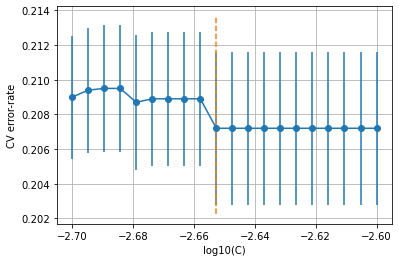

In [34]:
import matplotlib.pyplot as plt
err_mean = 1-gscv.cv_results_['mean_test_score'] 
err_se = gscv.cv_results_['std_test_score']/np.sqrt(nfold-1)
imin = np.argmin(err_mean)
C_min = C_lasso[imin] 

plt.errorbar(np.log10(C_lasso), err_mean, marker='o',yerr=err_se)
xmin, xmax, ymin, ymax = plt.axis()
plt.plot(np.log10([C_min,C_min]),[ymin,ymax],'--')

plt.grid()
plt.xlabel('log10(C)')
plt.ylabel('CV error-rate')

print("Accuracy via 10-fold CV is %f with SE=%12.4e" % (1-err_mean[imin],err_se[imin]))

[ 0.          0.          0.5516908   0.03791757  0.          0.
  0.         -0.82831351]


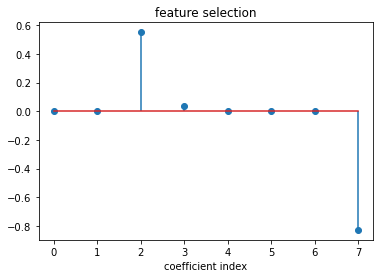

In [35]:
pipe_best = gscv.best_estimator_ 

W_l1 = pipe_best.named_steps["featsel"].estimator_.coef_

support = pipe_best.named_steps["featsel"].get_support()

plt.stem(W_l1[0,:])
plt.title('feature selection')
plt.xlabel('coefficient index')

print(W_l1[0,:])

Feature selection:L1 regularization tuned with GridSearchCV and the one-standard-error rule

In [36]:
lasso = LogisticRegression(penalty='l1', solver='liblinear', warm_start=True, multi_class='ovr')

npen = 20
C_lasso = np.logspace(-0.5,1.5,npen)

parameters = {'C':C_lasso}
clf = GridSearchCV(lasso, parameters, cv=kf, scoring='accuracy')
clf.fit(Xtr_standardized,ytr_standardized);

[ 0.01269457  0.04388146  1.12838664  0.36272912  0.02316954 -0.06138127
 -0.07923075 -1.20055472]


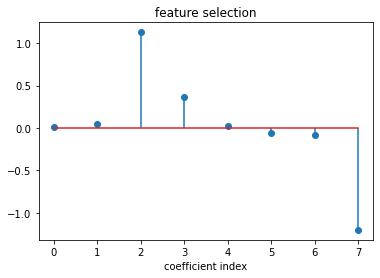

In [37]:
err_mean = 1-clf.cv_results_['mean_test_score'] 
err_se = clf.cv_results_['std_test_score']/np.sqrt(nfold-1)
imin = np.argmin(err_mean)
C_min = C_lasso[imin]

xmin, xmax, ymin, ymax = plt.axis()

err_tgt = err_mean[imin] + err_se[imin]
iose = np.where(err_mean < err_tgt)[0][0]
C_ose = C_lasso[iose]

lasso = LogisticRegression(C=C_ose,penalty='l1',solver='liblinear',multi_class='ovr')
lasso.fit(Xtr_standardized,ytr_standardized)

W_ose = lasso.coef_


plt.stem(W_ose[0,:])
plt.title('feature selection')
plt.xlabel('coefficient index')
print(W_ose[0,:])

With selected features, use SVM with RBF kernel using StandardScaler.

In [38]:
scaler = preprocessing.StandardScaler().fit(Xtr)

# standardize the training data
Xtr_standardized = scaler.transform(Xtr)[:, [2,3,5,6,7]] # revise this line as needed
Xts_standardized = scaler.transform(Xts)[:, [2,3,5,6,7]] # revise this line as needed
ytr_standardized = ytr # revise this line as needed

# save the standardized training data
Xtr_savepath = 'Xtr_sklearn_featsel.csv'
Xts_savepath = 'Xts_sklearn_featsel.csv'
ytr_savepath = 'ytr_sklearn_featsel.csv'

np.savetxt(Xtr_savepath, Xtr_standardized, delimiter=",")
np.savetxt(Xts_savepath, Xts_standardized, delimiter=",")
np.savetxt(ytr_savepath, ytr_standardized, delimiter=",")

In [39]:
X_train, X_val, y_train, y_val = train_test_split(Xtr_standardized, ytr_standardized, test_size=0.2, shuffle=True, random_state=42)

Tune the parameter C.

In [40]:
C_list = [1e-3, 0.01, 0.1, 1, 10, 20, 50, 100]
for C in C_list:
    SVM = svm.SVC(kernel='rbf', C=C)
    SVM.fit(X_train, y_train)

    auc = roc_auc_score(y_val,SVM.decision_function(X_val))
    print('val auc: ',auc, C)

val auc:  0.8433917705262796 0.001
val auc:  0.8621102032373171 0.01
val auc:  0.8886385771663996 0.1
val auc:  0.9006007481339747 1
val auc:  0.9096281308717313 10
val auc:  0.9091885590663841 20
val auc:  0.9070693489165849 50
val auc:  0.9067956939201186 100


In [41]:
C_list = [5,7,9,11,13,15]
for C in C_list:
    SVM = svm.SVC(kernel='rbf', C=C)
    SVM.fit(X_train, y_train)

    auc = roc_auc_score(y_val,SVM.decision_function(X_val))
    print('val auc: ',auc, C)

val auc:  0.9076328196376549 5
val auc:  0.9097046249849168 7
val auc:  0.9096184344348486 9
val auc:  0.9097283273861853 11
val auc:  0.9097929702987362 13
val auc:  0.9094579045353469 15


Get the model 'svm3', and the performance is much better.

In [42]:
SVM = svm.SVC(kernel='rbf', C=13)
SVM.fit(Xtr_standardized, ytr_standardized)

SVC(C=13)

In [43]:
yts_hat_savepath = 'svm3.csv'

In [44]:
model_savepath = 'SVM3.bz2'
with bz2.BZ2File(model_savepath, 'w') as f:
    pickle.dump(SVM,f)

In [45]:
!python {"validation.py " + model_savepath + " --Xts_path " + Xts_savepath + " --Xtr_path " + Xtr_savepath + " --yts_hat_path " + yts_hat_savepath } 

training auc =  0.9191631715510442
test label confidences saved in svm3.csv


Try tuning gamma.

In [46]:
C_list2 = [i for i in range(10,31,5)]
g_list = [0.01,0.04,0.1,0.2,0.4,0.6,0.8,1.6,3.2,6.4,12.8]
for C in C_list2:
    for g in g_list:
        SVM = svm.SVC(kernel='rbf', C=C, gamma=g)
        SVM.fit(X_train, y_train)

        auc = roc_auc_score(y_val,SVM.decision_function(X_val))
        print('val auc: ',auc, C, g)

val auc:  0.8844249366499457 10 0.01
val auc:  0.8988553894950958 10 0.04
val auc:  0.9063895209529228 10 0.1
val auc:  0.909673380910517 10 0.2
val auc:  0.9053466152970988 10 0.4
val auc:  0.9025206426367414 10 0.6
val auc:  0.9009293496061093 10 0.8
val auc:  0.891616460671252 10 1.6
val auc:  0.8865333729809863 10 3.2
val auc:  0.8774230318387891 10 6.4
val auc:  0.8559895968006068 10 12.8
val auc:  0.886332979952078 15 0.01
val auc:  0.9011372843081484 15 0.04
val auc:  0.9082997190188068 15 0.1
val auc:  0.9095764165416904 15 0.2
val auc:  0.9037100722276808 15 0.4
val auc:  0.9026273034424506 15 0.6
val auc:  0.9004219027425833 15 0.8
val auc:  0.8911025495164708 15 1.6
val auc:  0.8845833117856958 15 3.2
val auc:  0.8757002982193032 15 6.4
val auc:  0.8509970091879127 15 12.8
val auc:  0.8878111478857457 20 0.01
val auc:  0.9015456120390961 20 0.04
val auc:  0.9094535950078434 20 0.1
val auc:  0.9092736722345762 20 0.2
val auc:  0.9035161434900278 20 0.4
val auc:  0.90156069538

In [47]:
C_list2 = [i for i in range(35,51,5)]
g_list = [0.04,0.1,0.2,0.4,0.6,0.8,1.6]
for C in C_list2:
    for g in g_list:
        SVM = svm.SVC(kernel='rbf', C=C, gamma=g)
        SVM.fit(X_train, y_train)

        auc = roc_auc_score(y_val,SVM.decision_function(X_val))
        print('val auc: ',auc, C, g)

val auc:  0.9036034114219716 35 0.04
val auc:  0.9098199048456328 35 0.1
val auc:  0.9071393787385151 35 0.2
val auc:  0.9034665839237386 35 0.4
val auc:  0.9009422781886193 35 0.6
val auc:  0.8989448121907914 35 0.8
val auc:  0.8892085121787248 35 1.6
val auc:  0.9042994001137715 40 0.04
val auc:  0.9097197083311784 40 0.1
val auc:  0.9071102894278672 40 0.2
val auc:  0.9037671734671011 40 0.4
val auc:  0.9008097602178897 40 0.6
val auc:  0.8978092516936442 40 0.8
val auc:  0.8888411249590595 40 1.6
val auc:  0.9043791263725844 45 0.04
val auc:  0.9100084466739067 45 0.1
val auc:  0.9070348726965576 45 0.2
val auc:  0.9036529709882608 45 0.4
val auc:  0.900365878885039 45 0.6
val auc:  0.8962578217924186 45 0.8
val auc:  0.8884575770112565 45 1.6
val auc:  0.9045407336539621 50 0.04
val auc:  0.9102767147609936 50 0.1
val auc:  0.9070467238971919 50 0.2
val auc:  0.9031250538690938 50 0.4
val auc:  0.8997108307045216 50 0.6
val auc:  0.8949455706676321 50 0.8
val auc:  0.8887387736808

In [48]:
C_list2 = [i for i in range(45,56,2)]
g_list = [0.08,0.1,0.15]
for C in C_list2:
    for g in g_list:
        SVM = svm.SVC(kernel='rbf', C=C, gamma=g)
        SVM.fit(X_train, y_train)

        auc = roc_auc_score(y_val,SVM.decision_function(X_val))
        print('val auc: ',auc, C, g)

val auc:  0.9101668218096569 45 0.08
val auc:  0.9100084466739067 45 0.1
val auc:  0.9097692678974677 45 0.15
val auc:  0.9100795538777128 47 0.08
val auc:  0.9100623157676991 47 0.1
val auc:  0.9097358690593162 47 0.15
val auc:  0.9100763217320853 49 0.08
val auc:  0.9102422385409665 49 0.1
val auc:  0.9097584940787091 49 0.15
val auc:  0.910144196790264 51 0.08
val auc:  0.9103004171622625 51 0.1
val auc:  0.9095958094154556 51 0.15
val auc:  0.9102443933047181 53 0.08
val auc:  0.9103650600748133 53 0.1
val auc:  0.9095548689041731 53 0.15
val auc:  0.9101819051559187 55 0.08
val auc:  0.9104426315698748 55 0.1
val auc:  0.9093566306390167 55 0.15


In [49]:
C_list2 = [i for i in range(60, 101, 10)]
g_list = [0.1]
for C in C_list2:
    for g in g_list:
        SVM = svm.SVC(kernel='rbf', C=C, gamma=g)
        SVM.fit(X_train, y_train)

        auc = roc_auc_score(y_val,SVM.decision_function(X_val))
        print('val auc: ',auc, C, g)

val auc:  0.9104781851717778 60 0.1
val auc:  0.9106656496181759 70 0.1
val auc:  0.9107464532588647 80 0.1
val auc:  0.9107690782782576 90 0.1
val auc:  0.9105870007412387 100 0.1


In [50]:
C_list2 = [i for i in range(85, 96, 2)] + [110, 120]
g_list = [0.1]
for C in C_list2:
    for g in g_list:
        SVM = svm.SVC(kernel='rbf', C=C, gamma=g)
        SVM.fit(X_train, y_train)

        auc = roc_auc_score(y_val,SVM.decision_function(X_val))
        print('val auc: ',auc, C, g)

val auc:  0.9107744651876368 85 0.1
val auc:  0.9107938580614022 87 0.1
val auc:  0.9107636913688784 89 0.1
val auc:  0.9107539949319957 91 0.1
val auc:  0.9106958163106997 93 0.1
val auc:  0.9106473341262864 95 0.1
val auc:  0.9103478219647999 110 0.1
val auc:  0.9103251969454069 120 0.1


# Finally, we get the best model 'SVM4'. The validation AUC is 0.9108.

In [51]:
SVM = svm.SVC(kernel='rbf', C=87, gamma=0.1)
SVM.fit(Xtr_standardized, ytr_standardized)

SVC(C=87, gamma=0.1)

In [52]:
yts_hat_savepath = 'svm4.csv'

In [53]:
model_savepath = 'SVM4.bz2'
with bz2.BZ2File(model_savepath, 'w') as f:
    pickle.dump(SVM,f)

In [54]:
!python {"validation.py " + model_savepath + " --Xts_path " + Xts_savepath + " --Xtr_path " + Xtr_savepath + " --yts_hat_path " + yts_hat_savepath } 

training auc =  0.9184651732583554
test label confidences saved in svm4.csv
